In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sys
from sklearn import preprocessing

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [51]:
df= pd.read_csv("train.csv")
df.head()

,Client ID,Company ID,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Flag 6,Activity 1 Time Period 11,...,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0,Client Retention Flag
0,10004519380,6294937,Jun,Multi Year,2,Yes,Unknown,8,Manufacturing,24,...,0,0,0,0,0,0,0,1,0,Yes
1,10004521476,6293796,Mar,Multi Year,7,No,Yes,6,Government,9,...,0,0,0,0,0,1,0,0,0,No
2,10004515403,6293911,Dec,Multi Year,2,No,Unknown,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,Yes
3,10004511478,6293048,Feb,Multi Year,2,No,Unknown,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,No
4,10004516858,6294364,Jun,Multi Year,7,No,Unknown,9,"Banking, Finance & Ins",16,...,0,0,0,0,0,0,0,0,0,Yes


In [52]:
df.shape

(8766, 106)

In [53]:
df['Flag 3'].unique()

array(['Yes', 'No', 'C'], dtype=object)

In [54]:
df['Flag 4'].unique()

array(['Unknown', 'Yes', 'No'], dtype=object)

In [55]:
display(df.isnull().any())

Client ID                         False
Company ID                        False
Client Contract Starting Month    False
Flag 1                            False
Flag 2                            False
Flag 3                            False
Flag 4                            False
Flag 5                            False
Flag 6                            False
Activity 1 Time Period 11         False
Activity 1 Time Period 10         False
Activity 1 Time Period 9          False
Activity 1 Time Period 8          False
Activity 1 Time Period 7          False
Activity 1 Time Period 6          False
Activity 1 Time Period 5          False
Activity 1 Time Period 4          False
Activity 1 Time Period 3          False
Activity 1 Time Period 2          False
Activity 1 Time Period 1          False
Activity 1 Time Period 0          False
Activity 2 Time Period 11         False
Activity 2 Time Period 10         False
Activity 2 Time Period 9          False
Activity 2 Time Period 8          False


In [56]:
df['Client Retention Flag'].value_counts()

Yes    6170
No     2596
Name: Client Retention Flag, dtype: int64

In [57]:
df.groupby(['Flag 1'])['Client Retention Flag'].value_counts(normalize=True)

Flag 1       Client Retention Flag
Multi Year   Yes                      0.670805
             No                       0.329195
Single Year  Yes                      0.719522
             No                       0.280478
Name: Client Retention Flag, dtype: float64

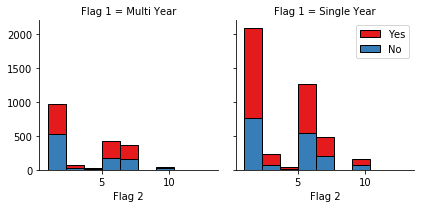

In [58]:
import seaborn as sns

bins = np.linspace(df['Flag 2'].min(), df['Flag 2'].max(), 10)
g = sns.FacetGrid(df, col="Flag 1", hue="Client Retention Flag", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Flag 2', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [59]:
df.groupby(['Flag 6'])['Client Retention Flag'].value_counts(normalize=True)

Flag 6                  Client Retention Flag
Banking, Finance & Ins  Yes                      0.761760
                        No                       0.238240
Education               Yes                      0.676096
                        No                       0.323904
Energy & Utilities      Yes                      0.803279
                        No                       0.196721
Government              Yes                      0.786004
                        No                       0.213996
Healthcare              Yes                      0.689266
                        No                       0.310734
Manufacturing           Yes                      0.661306
                        No                       0.338694
Retail                  Yes                      0.669903
                        No                       0.330097
Services                Yes                      0.702703
                        No                       0.297297
Technology and Telecom  Ye

In [60]:
df['Client Contract Starting Month'].replace(to_replace=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], value=[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
df.head(100)

,Client ID,Company ID,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Flag 6,Activity 1 Time Period 11,...,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0,Client Retention Flag
0,10004519380,6294937,6,Multi Year,2,Yes,Unknown,8,Manufacturing,24,...,0,0,0,0,0,0,0,1,0,Yes
1,10004521476,6293796,3,Multi Year,7,No,Yes,6,Government,9,...,0,0,0,0,0,1,0,0,0,No
2,10004515403,6293911,12,Multi Year,2,No,Unknown,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,Yes
3,10004511478,6293048,2,Multi Year,2,No,Unknown,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,No
4,10004516858,6294364,6,Multi Year,7,No,Unknown,9,"Banking, Finance & Ins",16,...,0,0,0,0,0,0,0,0,0,Yes
5,10004521519,6292276,6,Single Year,7,No,Yes,3,Education,10,...,0,0,0,0,1,0,0,0,0,Yes
6,10004510565,6294388,5,Multi Year,2,No,Unknown,16,Government,0,...,0,0,0,0,0,0,0,0,0,Yes
7,10004519510,6292068,7,Single Year,2,Yes,Unknown,3,Education,0,...,0,0,0,0,0,0,0,0,0,Yes
8,10004521134,6293710,10,Multi Year,2,Yes,Yes,7,Government,14,...,0,0,0,0,0,0,0,0,0,Yes
9,10004519931,6293762,5,Multi Year,2,Yes,Yes,3,Education,64,...,0,0,0,0,0,0,0,0,0,Yes


In [61]:
df['Flag 1'].replace(to_replace=['Multi Year','Single Year'], value=[1,0],inplace=True)
df.head()

,Client ID,Company ID,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Flag 6,Activity 1 Time Period 11,...,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0,Client Retention Flag
0,10004519380,6294937,6,1,2,Yes,Unknown,8,Manufacturing,24,...,0,0,0,0,0,0,0,1,0,Yes
1,10004521476,6293796,3,1,7,No,Yes,6,Government,9,...,0,0,0,0,0,1,0,0,0,No
2,10004515403,6293911,12,1,2,No,Unknown,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,Yes
3,10004511478,6293048,2,1,2,No,Unknown,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,No
4,10004516858,6294364,6,1,7,No,Unknown,9,"Banking, Finance & Ins",16,...,0,0,0,0,0,0,0,0,0,Yes


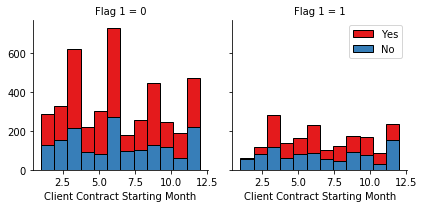

In [62]:
import seaborn as sns

bins = np.linspace(df['Client Contract Starting Month'].min(), df['Client Contract Starting Month'].max(), 13)
g = sns.FacetGrid(df, col="Flag 1", hue="Client Retention Flag", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Client Contract Starting Month', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [63]:
df['Client Retention Flag'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
df.head()

,Client ID,Company ID,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Flag 6,Activity 1 Time Period 11,...,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0,Client Retention Flag
0,10004519380,6294937,6,1,2,Yes,Unknown,8,Manufacturing,24,...,0,0,0,0,0,0,0,1,0,1
1,10004521476,6293796,3,1,7,No,Yes,6,Government,9,...,0,0,0,0,0,1,0,0,0,0
2,10004515403,6293911,12,1,2,No,Unknown,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,1
3,10004511478,6293048,2,1,2,No,Unknown,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,0
4,10004516858,6294364,6,1,7,No,Unknown,9,"Banking, Finance & Ins",16,...,0,0,0,0,0,0,0,0,0,1


In [64]:

count=0
for t in df.columns:
    count+=1
    print(count,t)

1 Client ID
2 Company ID
3 Client Contract Starting Month
4 Flag 1
5 Flag 2
6 Flag 3
7 Flag 4
8 Flag 5
9 Flag 6
10 Activity 1 Time Period 11
11 Activity 1 Time Period 10
12 Activity 1 Time Period 9
13 Activity 1 Time Period 8
14 Activity 1 Time Period 7
15 Activity 1 Time Period 6
16 Activity 1 Time Period 5
17 Activity 1 Time Period 4
18 Activity 1 Time Period 3
19 Activity 1 Time Period 2
20 Activity 1 Time Period 1
21 Activity 1 Time Period 0
22 Activity 2 Time Period 11
23 Activity 2 Time Period 10
24 Activity 2 Time Period 9
25 Activity 2 Time Period 8
26 Activity 2 Time Period 7
27 Activity 2 Time Period 6
28 Activity 2 Time Period 5
29 Activity 2 Time Period 4
30 Activity 2 Time Period 3
31 Activity 2 Time Period 2
32 Activity 2 Time Period 1
33 Activity 2 Time Period 0
34 Activity 3 Time Period 11
35 Activity 3 Time Period 10
36 Activity 3 Time Period 9
37 Activity 3 Time Period 8
38 Activity 3 Time Period 7
39 Activity 3 Time Period 6
40 Activity 3 Time Period 5
41 Activity 3 

In [65]:
df['Flag 3'].replace(to_replace=['Yes','No','C'], value=[1,0,0.5],inplace=True)
df.head()

,Client ID,Company ID,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Flag 6,Activity 1 Time Period 11,...,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0,Client Retention Flag
0,10004519380,6294937,6,1,2,1.0,Unknown,8,Manufacturing,24,...,0,0,0,0,0,0,0,1,0,1
1,10004521476,6293796,3,1,7,0.0,Yes,6,Government,9,...,0,0,0,0,0,1,0,0,0,0
2,10004515403,6293911,12,1,2,0.0,Unknown,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,1
3,10004511478,6293048,2,1,2,0.0,Unknown,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,0
4,10004516858,6294364,6,1,7,0.0,Unknown,9,"Banking, Finance & Ins",16,...,0,0,0,0,0,0,0,0,0,1


In [66]:
df['Flag 4'].replace(to_replace=['Yes','No','Unknown'], value=[1,0,0.5],inplace=True)
df.head()

,Client ID,Company ID,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Flag 6,Activity 1 Time Period 11,...,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0,Client Retention Flag
0,10004519380,6294937,6,1,2,1.0,0.5,8,Manufacturing,24,...,0,0,0,0,0,0,0,1,0,1
1,10004521476,6293796,3,1,7,0.0,1.0,6,Government,9,...,0,0,0,0,0,1,0,0,0,0
2,10004515403,6293911,12,1,2,0.0,0.5,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,1
3,10004511478,6293048,2,1,2,0.0,0.5,15,Technology and Telecom,1,...,0,0,0,0,0,0,0,0,0,0
4,10004516858,6294364,6,1,7,0.0,0.5,9,"Banking, Finance & Ins",16,...,0,0,0,0,0,0,0,0,0,1


In [67]:
Feature=df

In [68]:
Feature =Feature.drop(['Client ID','Company ID','Flag 6','Client Retention Flag'], axis=1)
Feature.head()

,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Activity 1 Time Period 11,Activity 1 Time Period 10,Activity 1 Time Period 9,Activity 1 Time Period 8,...,Activity 8 Time Period 9,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0
0,6,1,2,1.0,0.5,8,24,16,20,52,...,0,0,0,0,0,0,0,0,1,0
1,3,1,7,0.0,1.0,6,9,2,0,18,...,0,0,0,0,0,0,1,0,0,0
2,12,1,2,0.0,0.5,15,1,11,12,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,2,0.0,0.5,15,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,1,7,0.0,0.5,9,16,14,48,6,...,0,0,0,0,0,0,0,0,0,0


In [69]:
Feature = pd.concat([Feature,pd.get_dummies(df['Flag 6'])], axis=1)
Feature.head()

,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Activity 1 Time Period 11,Activity 1 Time Period 10,Activity 1 Time Period 9,Activity 1 Time Period 8,...,"Banking, Finance & Ins",Education,Energy & Utilities,Government,Healthcare,Manufacturing,Retail,Services,Technology and Telecom,Unknown
0,6,1,2,1.0,0.5,8,24,16,20,52,...,0,0,0,0,0,1,0,0,0,0
1,3,1,7,0.0,1.0,6,9,2,0,18,...,0,0,0,1,0,0,0,0,0,0
2,12,1,2,0.0,0.5,15,1,11,12,0,...,0,0,0,0,0,0,0,0,1,0
3,2,1,2,0.0,0.5,15,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,1,7,0.0,0.5,9,16,14,48,6,...,1,0,0,0,0,0,0,0,0,0


In [70]:
X = Feature
X[0:500]

,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Activity 1 Time Period 11,Activity 1 Time Period 10,Activity 1 Time Period 9,Activity 1 Time Period 8,...,"Banking, Finance & Ins",Education,Energy & Utilities,Government,Healthcare,Manufacturing,Retail,Services,Technology and Telecom,Unknown
0,6,1,2,1.0,0.5,8,24,16,20,52,...,0,0,0,0,0,1,0,0,0,0
1,3,1,7,0.0,1.0,6,9,2,0,18,...,0,0,0,1,0,0,0,0,0,0
2,12,1,2,0.0,0.5,15,1,11,12,0,...,0,0,0,0,0,0,0,0,1,0
3,2,1,2,0.0,0.5,15,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,1,7,0.0,0.5,9,16,14,48,6,...,1,0,0,0,0,0,0,0,0,0
5,6,0,7,0.0,1.0,3,10,6,30,52,...,0,1,0,0,0,0,0,0,0,0
6,5,1,2,0.0,0.5,16,0,0,2,0,...,0,0,0,1,0,0,0,0,0,0
7,7,0,2,1.0,0.5,3,0,6,14,0,...,0,1,0,0,0,0,0,0,0,0
8,10,1,2,1.0,1.0,7,14,28,22,38,...,0,0,0,1,0,0,0,0,0,0
9,5,1,2,1.0,1.0,3,64,144,212,220,...,0,1,0,0,0,0,0,0,0,0


In [71]:
y = df['Client Retention Flag'].values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [102]:
seed = 7
np.random.seed(seed)

In [107]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(112, input_dim=112, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [108]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

In [72]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.34936508e-01,  1.45245080e+00, -9.00542330e-01,
         9.77829553e-01, -5.24639169e-01, -1.94900839e-01,
         3.54964218e-01,  6.76658592e-02,  2.78544142e-01,
         1.30797980e+00, -3.90048113e-01,  7.24164264e-02,
         2.84003026e+00,  1.08935726e+00,  1.05613932e-01,
         2.83697483e-01, -1.03670089e-01,  6.96587376e-01,
         4.61829107e-01, -2.59421852e-01, -1.91302588e-01,
        -2.48894527e-01, -2.64199560e-01,  1.23228033e-01,
         7.03660699e+00,  3.32232270e+00,  6.58239199e-01,
        -2.30160064e-01, -2.24925538e-01,  3.13162633e-01,
        -2.35286354e-01,  2.59521563e+00,  1.03718717e+00,
         9.04414077e-01,  1.03489963e+00,  1.08868484e+00,
         2.32902571e+00, -2.75619772e-01,  1.13576741e+00,
        -2.87740384e-01,  9.77299518e-01,  1.10916369e+00,
         1.26062228e+00, -4.80610002e-01, -4.68851044e-01,
         9.79553539e-01, -4.86449636e-01, -4.73595542e-01,
        -5.03862022e-01,  2.18274870e+00, -5.23078898e-0

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7012, 112) (7012,)
Test set: (1754, 112) (1754,)


In [74]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [75]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [76]:
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.64937286, 0.55074116, 0.64709236, 0.6031927 , 0.65906499,
       0.63340935, 0.66875713, 0.64139111, 0.672748  , 0.663626  ,
       0.67673888, 0.66077537, 0.68301026, 0.66989738])

In [77]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
yhat = DT_model.predict(X_test)
yhat

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [79]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [80]:
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

KNN Jaccard index: 0.75
KNN F1-score: 0.74


In [81]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
yhat = SVM_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [83]:
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

KNN Jaccard index: 0.73
KNN F1-score: 0.64


In [84]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
yhat = LR_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [86]:
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

KNN Jaccard index: 0.72
KNN F1-score: 0.67


In [87]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=44, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
predictions = [round(value) for value in y_pred]
print(predictions)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0,

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 261  240]
 [  75 1178]]
             precision    recall  f1-score   support

          0       0.78      0.52      0.62       501
          1       0.83      0.94      0.88      1253

avg / total       0.82      0.82      0.81      1754

0.8204104903078677


In [89]:
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, predictions))
print("KNN F1-score: %.2f" % f1_score(y_test, predictions, average='weighted') )

KNN Jaccard index: 0.82
KNN F1-score: 0.81


In [90]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.04%


In [91]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print(predictions)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 

C:\Users\lucky\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [92]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.44%


In [93]:
numTrees=[500]
randomDict={}
for numTree in numTrees:
    randFr = RandomForestClassifier(n_estimators=numTree, oob_score=True, random_state=0)
    randFr.fit(X_train, y_train)
    randomDict[numTree]=randFr
    predicted = randFr.predict(X_test)
    randFr_accuracy = accuracy_score(y_test, predicted)
    #feature_importances = trainData(randFr.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance', ascending=False)
    print("#################################")
    print(numTree)
    #print(feature_importances)
    print(f'Out-of-bag score estimate: {randFr.oob_score_:.3}')
    print(f'Mean accuracy score: {randFr_accuracy:.3}')
# feature_importances = trainData[(randFr.feature_importances_,index = x_train.columns,columns=['importance'])].sort_values('importance', ascending=False)
# print(feature_importances)

#################################
500
Out-of-bag score estimate: 0.771
Mean accuracy score: 0.79


Feature ranking:
1. feature Activity 1 Time Period 0tr (0.057454)
2. feature Activity 1 Time Period 2tr (0.049097)
3. feature Activity 1 Time Period 1tr (0.049012)
4. feature Activity 1 Time Period 4tr (0.043132)
5. feature Client Contract Starting Monthtr (0.042711)
6. feature Activity 1 Time Period 3tr (0.041607)
7. feature Activity 1 Time Period 5tr (0.035156)
8. feature Activity 1 Time Period 9tr (0.033938)
9. feature Activity 1 Time Period 6tr (0.032660)
10. feature Activity 1 Time Period 7tr (0.031764)
11. feature Activity 1 Time Period 8tr (0.031612)
12. feature Activity 1 Time Period 10tr (0.030110)
13. feature Activity 1 Time Period 11tr (0.027912)
14. feature Flag 5tr (0.022611)
15. feature Flag 2tr (0.020961)
16. feature Activity 4 Time Period 0tr (0.014340)
17. feature Activity 2 Time Period 2tr (0.013306)
18. feature Activity 2 Time Period 4tr (0.012408)
19. feature Activity 2 Time Period 1tr (0.012044)
20. feature Activity 4 Time Period 4tr (0.011780)
21. feature Activity

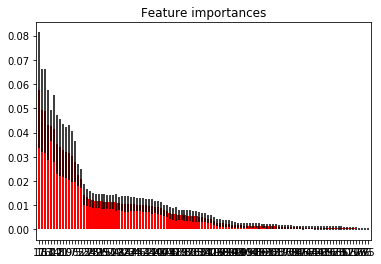

In [94]:

importances = randFr.feature_importances_
std = np.std([tree.feature_importances_ for tree in randFr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
#print(*indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %str (%f)" % (f + 1, Feature.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()